# Step 6 - Plotting

## Modelling Example
Jupyter notebook is designed to work as an interactive notebook for data manipulation. A central aspect of this tool is to allow for easy movement of data from structures that contain quantitative informaion to visulization of the data (*read: plot*.) As a first step you need to get an elementary undestanding of an object called numpy array.  

numpy arrays or `ndarrays` are not like regular python arrays.  They are special structures that superficially opeate the way python arrays but are much more complicated. `numpy` simplifies many of the things we like to do with physics modelling like building a list of sample times and ask the question *How does our model behave as time evolves?*  Or, with datasets determined from experiments we would want to chart the dependant value with respect to (w.r.t) the independant value so we can discover relationships or evaluate models we have built. **`numpy`** provides an simplified ways to do this without having to loop over elements.

In [ ]:
import numpy as np  # pretty typical way to import the numpy library and alias it as np for easy reference

# By way of an example lets investigate a small 
# toy car accelerating along a flat surface.

def acceleratingCarData(v0, a):
  t = np.arange(0.0, 10.0, 0.5)  # This creates and array of time steps from 0 to just under 10.0s in 0.5s steps
  x = v0 * t + (1/2) * a * t**2      # We can calculate the results of a list of numbers without explicit looping
  v = v0 + a * t                 # Next we do the same thing but with velocity
  return [t, x, v]   # Finally we return the arrays as ordered sets starting with the time, position, and velocity

# assign the data to a set of variables that holds all the time, position, and velocity
[cdTime, cdPos, cdVel] = acceleratingCarData(1.0, -0.1)


Note a couple of things about the code snippet shown above.  (Noteworthy if you have gone through the python code tutorial)

1. We can create an array of a list of values with a single function call.
0. __numpy__ allows us to do calculations, in parallel, in the same way we can do with variables holding single values.  (Look, ma, no `for` or `while` loops)
0. we can compose arrays (think the columns of a spreadsheet) based on parallel sets of arrays

There is much more we can learn about numpy arrays (a lot more) but for now lets see how this works for plotting.  The following example is intended to show how easy it is to generate a graph from a set of data. The sequence of commands are fairly intuitive as they follow the steps you might if you were doing this by hand.  The advantage to this 'command' line sequence over clicking through menus is twofold:

1. You have a record of the steps you took to produce a graph
2. the sequence is easily modified to change and enhance the graphs to better present your data


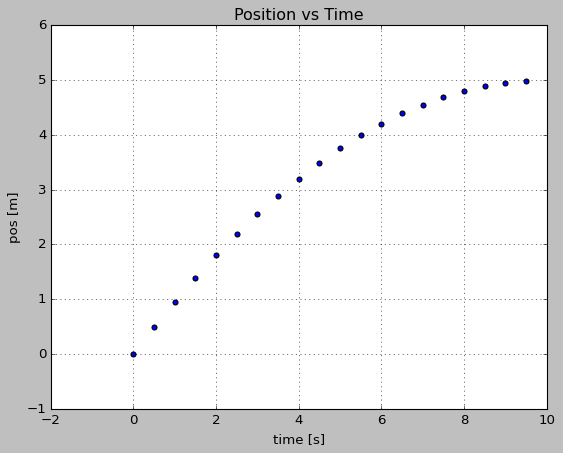

In [ ]:
import matplotlib.pyplot as plt # a standard way to import the basic plotting package and alias it to plt
# easier to see the graph in some layouts 
plt.style.use("classic") #ggplot, seaborn-poster, seaborn-notebook also work

# let's plot position as a function of time (time is the first row, pos is the second)
plt.scatter(cdTime, cdPos)  # we defined these data sets above.

plt.xlabel("time [s]")  # label our axes with units!
plt.ylabel("pos [m]")
plt.title("Position vs Time")
plt.grid(True)    # lets add a grid so we can evaluate the results.

plt.show()

So with the values we input it looks like our car is going to stop at about 5m from the starting location about 10s after we let go.

Let's look at the velocity as the car moves. To put 2 graphs on the same plot we just repeat the call.  We can do this for as many plots as we like.  See if you can spot the drawback aside from the different units on the y axis.

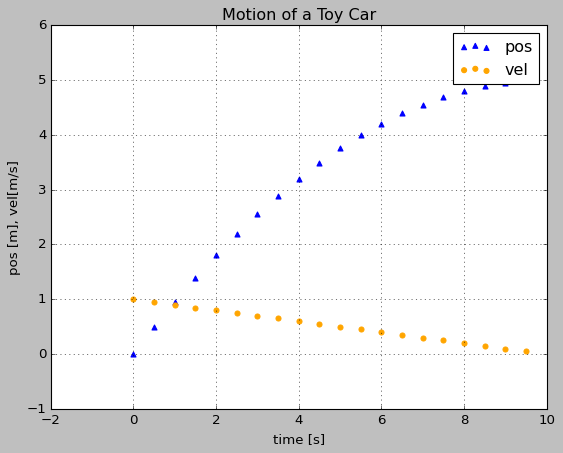

In [ ]:
import matplotlib.pyplot as plt # a standard way to import the basic plotting library
# easier to see the graph in some layouts 
plt.style.use("classic") #ggplot, seaborn-poster, seaborn-notebook also work

# let's plot position as a function of time (time is the first row, pos is the second)
plt.scatter(cdTime, cdPos, marker="^", color="blue", label="pos")  # NEW we label our data sets select a shape and color
plt.scatter(cdTime, cdVel, marker="o", color="orange", label="vel")  # NEW we add another plot in the same axis as the position

plt.xlabel("time [s]")  # label our axes with units!
plt.ylabel("pos [m], vel[m/s]")
plt.title("Motion of a Toy Car")
plt.legend()
plt.grid(True)    # lets add a grid so we can evaluate the results.

plt.show()

The above plot uses the same numerical scaling which means one of the graphs can wind up overly compressed.  Maybe we want to plot them them so the time axes shared but they are on differnt charts (they do have different units).

N.B. to those already familiar with `matplotlib` this is the state engine way.  The OO way is probably better when we get to more complicated plots but I want to stay with the flow.

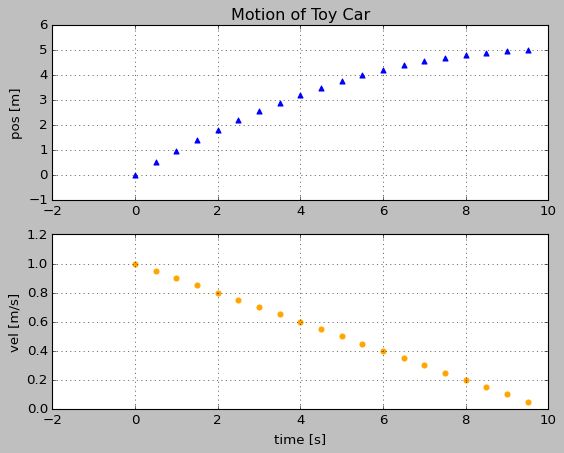

In [ ]:
import matplotlib.pyplot as plt # a standard way to import the basic plotting library
# easier to see the graph in some layouts 
plt.style.use("classic") #ggplot, seaborn-poster, seaborn-notebook also work

plt.subplot(2, 1, 1)   # NEW draw the first of two graphs (2 rows, 1 column, 1st)

plt.title("Motion of Toy Car")        # Title the overall plot by titling the top graph

# let's plot position as a function of time (time is the first row, pos is the second)
#plt.set_title("Position vs time")  We don't need this as we have a 'super title'
plt.scatter(cdTime, cdPos, marker="^", color="blue", label="pos")  # NEW we label our data sets select a shape and color
plt.ylabel("pos [m]")     # NEW we changed the function's name a bit and we save the horizontal label for the bottom graph
plt.grid(True)    # lets add a grid so we can evaluate the results.

# now we shift to the second graph
plt.subplot(2, 1, 2)   # NEW draw the second of two graphs (2 rows, 1 column, 2nd)
#plt2.set_title("Velocity vs time")  We don't need this as we have a 'super title'
plt.scatter(cdTime, cdVel, marker="o", color="orange", label="vel")  # NEW we add another plot in the same axis as the position
plt.ylabel("vel [m/s]")       # NEW we changed the function's name
plt.grid(True)    # lets add a grid so we can evaluate the results.

plt.xlabel("time [s]")        # NEW (notice the name change) label our bottom axes with units!

plt.show()

Not bad but perhaps we might want to join the two together, change the style, etc. That is beyond the scope of this notebook.  Check out the HOWTO guides for deeper insight.

## Fiting Data
This is part of the numpy package but it is important enough to break out into its own topic.  Aside from modelling fitting emprical data to modelling functions is the thing we do most often.  Wherever possible we always try to fit straight line relationships by manipulating the values so as to line up in a straight line.  Normally we would import data from an experiment but we will generate some random values to simulate an experiment of a spring being stretched by some masses.

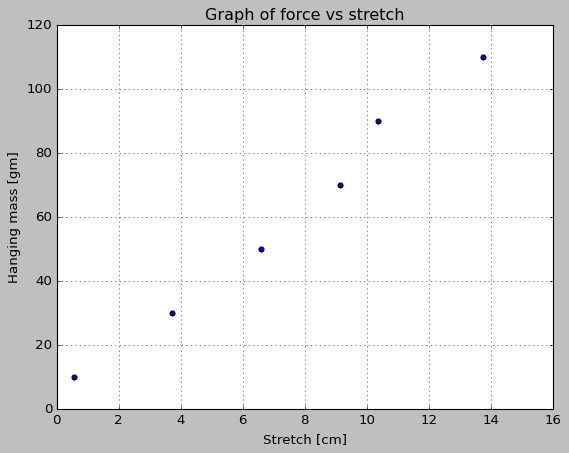

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# easier to see the graph in some layouts 
plt.style.use("classic") #ggplot, seaborn-poster, seaborn-notebook also work

####### Model Data ###########################
k = 7.8 # N/m

masses = np.linspace(10.,110.,num=6) # 6 masses from 10gm to 110gm
stretch = masses*9.81/(10*k)  # in cm wuth a little noise added in for fun
# add a little noise for realism
stretch = np.random.default_rng().normal(stretch, 0.5)
##############################################

plt.scatter(stretch, masses)  # short and sweet.
plt.title("Graph of force vs stretch")
plt.xlabel("Stretch [cm]")
plt.ylabel("Hanging mass [gm]")
plt.grid(True)

# for direct relationships ALWAYS force the display of 0,0
plt.xlim(left=0) # force the appearance of 0,0 
plt.ylim(bottom=0) # force the appearance of 0,0

plt.show()

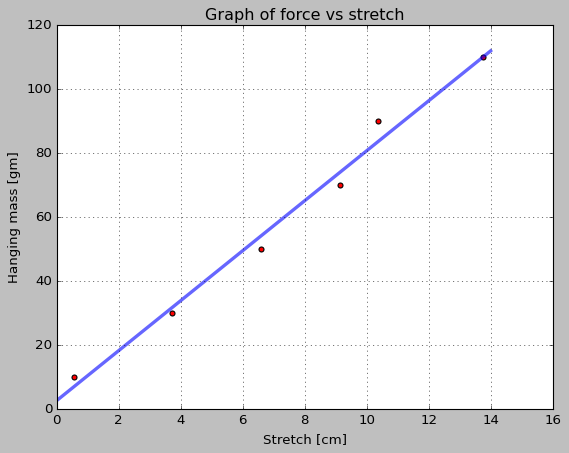

slope is   7.81 gm/cm or   7.66 N/m


In [ ]:
# all the data was generated above so we continue from there
m, b = np.polyfit(stretch, masses, 1)  # fit to linear function, the coefficients are captured in both variables at the same time.

sampLen = np.linspace(0.0, 14.0, 5)  # make a linear range to test the fit
plt.plot(sampLen, m*sampLen+b, alpha=0.6, linewidth=3)  # second plot overlaps first with a 3 pixel wide line and a bit of transparency

plt.scatter(stretch, masses, c="r")  # this is the same as above with a different color
plt.title("Graph of force vs stretch")
plt.xlabel("Stretch [cm]")
plt.ylabel("Hanging mass [gm]")
plt.grid(True)

# for direct relationships ALWAYS force the display of 0,0
plt.xlim(left=0) # force the appearance of 0,0 
plt.ylim(bottom=0) # force the appearance of 0,0

plt.show()
print(f"slope is {m:6.3} gm/cm or {(9.81/10) * m:6.3} N/m") # Yeah the conversions are 100 cm/m * 9.81m/s^2 * 1kg/1000gm ~ 1 (N/m) / (gm/cm)

## Plotting Experimental Data
Most of what we want jupyter to do is to help us visualize data.  The entire 
environment  is designed to manipulate information, allow calculations and visualize
the result.

There are many ways to present quantitative information in pictures.  The reason to 
do so is simply to make it easier to understand what the data is telling us.  A list of 1000 or even 100 pairs of values doesn't reall tell us what the numbers mean or what their relationship is but a chart or graph can.

For example, what can you tell from the following numbers by simple inspection?

|t [s]|x [ft]|
|:---:|:---:|
|  0.1| 0.0|
|   1.877|    1.63|
|   3.072|    6.37|
|   3.973|    11.8|
|   5.072|    20.7|
|   6.084|    30.9|
|   6.936|    41.2|
|   8.017|    56.2|
|   8.953|    71.1|



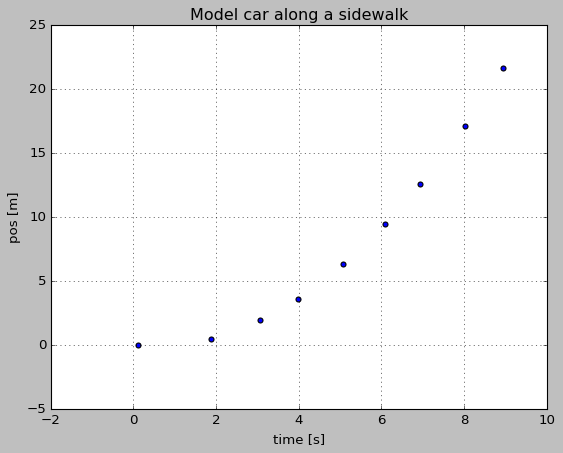

The coefficients of fit are A: 0.305*t^2 + B:-0.307*t + C: 0.016


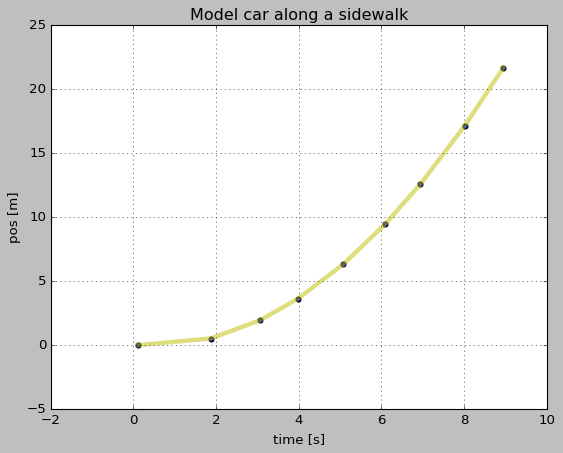

rough estimate of final speed:     4.85 m/s


In [66]:
# Standard imports (we usually just do this once at the top of the notebook)
import numpy as np
import matplotlib.pyplot as plt
# easier to see the graph in some layouts 
plt.style.use("classic") #ggplot, seaborn-poster, seaborn-notebook also work

# Here is one way to enter experimental values directly into an array this preserves 
# the pair-like structure of the original set the values are in s and ft
tx = np.array([
               [  0.1,    0.0],
               [  1.877,   1.63],
               [  3.072,   6.37],
               [  3.973,   11.8],
               [  5.072,   20.7],
               [  6.084,   30.9],
               [  6.936,   41.2],
               [  8.017,   56.2],
               [  8.953,   71.1],              
            ])
[t, x] = tx.T
x = x * 0.3048  # convert to meters

# present the data set suitable for pasting into a text cell
# print("|x|y|\n|:---:|:---:|")
# for i in range(10):
#   print(f"|{x[i]:8.4}|{y[i]:8.3}|")

# plot
plt.scatter(t, x)
plt.title("Model car along a sidewalk")
plt.xlabel("time [s]")
plt.ylabel("pos [m]")
plt.grid(True)

plt.show()

# fit the data
a, b, c = np.polyfit(t, x, 2)

print(f"The coefficients of fit are A:{a:6.3f}*t^2 + B:{b:6.3f}*t + C:{c:6.3f}")

# plot
plt.scatter(t, x)
plt.plot(t, a * t**2 + b * t + c, linewidth=4.0, alpha=0.5, c="y")
plt.title("Model car along a sidewalk")
plt.xlabel("time [s]")
plt.ylabel("pos [m]")
plt.grid(True)

plt.show()

print(f"rough estimate of final speed: {(x[-1]-x[-2])/(t[-1]-t[-2]):8.2f} m/s")

## Fitting noisy quadratics

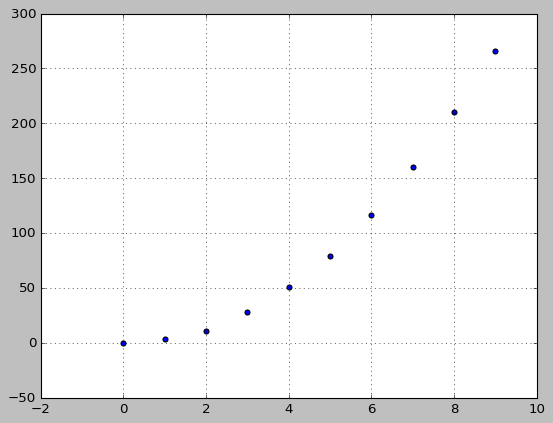

The coefficients of fit are A: 3.393*x^2 + B:-0.971*x + C: 0.003


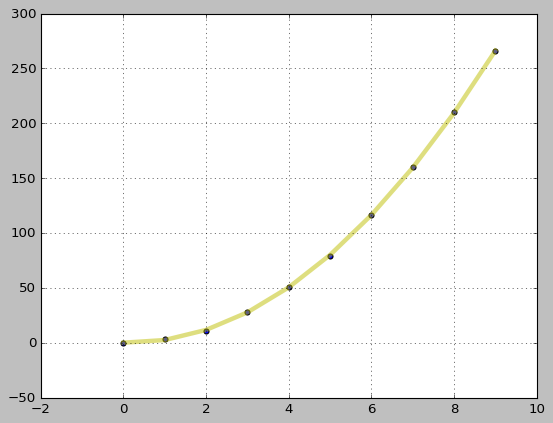

errors: a:  0.2% b:  2.9%


In [ ]:
# Standard imports (we usually just do this once at the top of the notebook)
import numpy as np
import matplotlib.pyplot as plt
# easier to see the graph in some layouts 
plt.style.use("classic") #ggplot, seaborn-poster, seaborn-notebook also work

x = np.arange(10.0)
y = 3.4 * x**2 - x   # add some noise
y = np.random.default_rng().normal(y, 0.5)

# present the data set suitable for pasting into a text cell
# print("|x|y|\n|:---:|:---:|")
# for i in range(10):
#   print(f"|{x[i]:8.4}|{y[i]:8.3}|")

# plot
plt.scatter(x,y)
plt.grid(True)

plt.show()

# fit the data
a, b, c = np.polyfit(x, y, 2)

print(f"The coefficients of fit are A:{a:6.3f}*x^2 + B:{b:6.3f}*x + C:{c:6.3f}")

# plot
plt.scatter(x,y)
plt.plot(x, a * x**2 + b * x + c, linewidth=4.0, alpha=0.5, c="y")
plt.grid(True)

plt.show()

print(f"errors: a:{100*np.abs(a-3.4)/3.4:5.1f}% b:{100*np.abs(b+1.0)/1.0:5.1f}%")